# 동적 크롤링(dynamic crawling)

* 웹 페이지의 동적 콘텐츠를 수집하기 위해 사용됩니다. 
* 동적 콘텐츠는 웹 페이지가 로드되는 시점에 자바스크립트 등의 스크립트를 통해 동적으로 생성되는 콘텐츠를 말합니다. 
* 이러한 동적 콘텐츠는 사용자 상호작용에 의해 변하거나, 
* 시간에 따라 변경되는 등의 특성을 가지고 있어, 정적 크롤링(static crawling) 방식으로는 수집하기 어려운 경우가 있습니다.

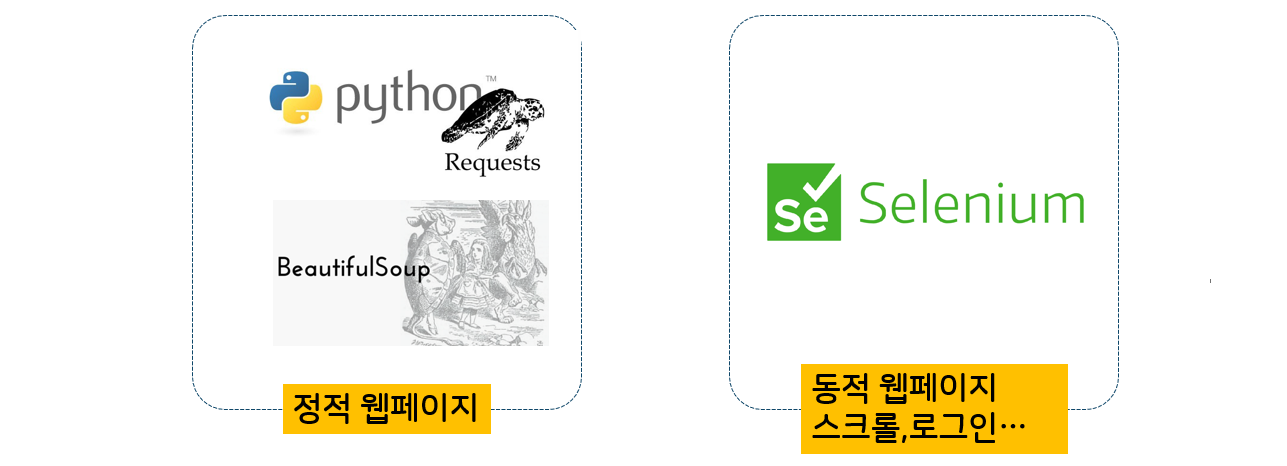

## 네이버 급상승 검색어를 찾아라

In [1]:
from bs4 import BeautifulSoup
import requests
html = requests.get('https://www.naver.com/')
soup = BeautifulSoup(html.content,"html.parser")
soup

 <!DOCTYPE html>
 <html class="fzoom" lang="ko"> <head> <meta charset="utf-8"/> <meta content="origin" name="Referrer"/> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <title>NAVER</title> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 

In [2]:
notices = soup.select('div.eg-flick-camera')
notices

[]

## 동적 크롤링
* 브라우저를 제어해서 크롤링하는 방법
* 라이브러리: Selenium
    * Selenium: 웹을 테스트하기 위한 프레임워크
    * 홈페이지: http://www.seleniumhq.org/
    * Selenium Python:  https://selenium-python.readthedocs.io/
    

## Selenium 설치

* Seleninum 버전4 설치
* pip install -U selenium
* pip install -U webdriver_manager

----- 구 버전용------
* Selenium 설치
    * 윈도우 검색창> cmd > 명령어프롬프트 > 마우스오른쪽 클릭 > '관리자권한으로실행' 선택
    * pip install selenium


* 웹드라이버 설치(크롬 브라우저 용)
    * 현재 사용하고 있는 크롬브라우저 버전 확인
        * 브라우저 URL창에 명령어 넣고 엔터 : chrome://version  
        * 2023.04.13일 현재 검색 결과 예) Chrome	111.0.5563.147 
        
    * https://sites.google.com/chromium.org/driver/?pli=1
    * 최신 버전 다운로드 받아서 아래의 폴더에 넣음(폴더가 없으면 폴더를 생성하여 경로 그대로 안에 드라이버 넣어둠)
        * 윈도우: C:/dev_python/Webdriver/chromedriver.exe
        * 맥: /usr/local/Cellar/chromedriver/chromedriver
        
 

## Selenium 확인

In [3]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

# 브라우저 꺼짐 방지(default는 사용하지 않아도 됨)
# chrome_opt = Options()
# chrome_opt.add_experimental_option('detach',True)


#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)
# driver = webdriver.Chrome(service=service,options=chrome_opt)


### 특정 사이트 호출 및 확인

In [4]:
driver.get("http://www.python.org")

print(driver.title)  # 브라우저에 표시된 타이틀 내용이 출력됨

Welcome to Python.org


In [5]:
driver.get("http://www.naver.com")

print(driver.title)  # 브라우저에 표시된 타이틀 내용이 출력됨

NAVER


In [6]:
driver.close()

## 검색 결과 가져오기

* 주요함수
    * find_element_by_tag_name(): 최초 발견한 태그만 가져오기
    * find_elements_by_tag_name(): 모든 태그 리스트로 가져오기 --> for문을 사용해서 각 데이터 풀어냄
    

In [7]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

# 브라우저 꺼짐 방지(default는 사용하지 않아도 됨)
# chrome_opt = Options()
# chrome_opt.add_experimental_option('detach',True)


#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)
# driver = webdriver.Chrome(service=service,options=chrome_opt)

driver.get("https://www.google.com/")




### 검색창 태그 가져오기

In [18]:
from selenium.webdriver.common.by import By
elem = driver.find_element(By.CSS_SELECTOR,"#APjFqb") #id로 찾기

In [19]:
elem

<selenium.webdriver.remote.webelement.WebElement (session="ea0d259469bcf6d9c4c2ae6f051a2bd5", element="f.4FC66DAE507CF2F497117A332240F543.d.92EA44653F5ACA0E3BF44AB5ED8B1A4B.e.110")>

### 검색어를 넣고 엔터 전송

In [20]:
elem.click()

In [21]:
# input 텍스트 초기화
elem.clear()

In [22]:
# 키 이벤트 전송
elem.send_keys("python")

In [23]:
# 엔터 입력
elem.send_keys(Keys.RETURN)

### 검색 결과가 가져오기

In [24]:
# 명시적으로 일정시간을 기다릴 수 있음 (10초 기다림)
# 기다리는 이유: 해당 사이트에서 검색하는데 걸리는 시간이 지연될 수 있으므로..
# import time
# time.sleep(10)

h3s = driver.find_elements(By.CSS_SELECTOR,'h3')

for h3 in h3s:
    print(h3.text)

# 크롬 브라우저 닫기 가능함
driver.quit()

Welcome to Python.org
Downloads
Python 3.13.0
Documentation
Python 3.13.1
Python Releases for Windows
Python - 파이썬
1. 파이썬 시작하기 - 왕초보를 위한 Python
파이썬 - 위키백과, 우리 모두의 백과사전
Python란 무엇인가요? - Python 언어 설명
Python Tutorial


## 종합코드

In [25]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)

driver.get("https://www.google.com/")

from selenium.webdriver.common.by import By
elem = driver.find_element(By.CSS_SELECTOR,"#APjFqb")

elem.click()
elem.clear()
elem.send_keys("python")
elem.send_keys(Keys.RETURN)


import time
time.sleep(5)

h3s = driver.find_elements(By.CSS_SELECTOR,'h3')

for h3 in h3s:
    print(h3.text)

# 크롬 브라우저 닫기 가능함
driver.quit()



Welcome to Python.org
Downloads
Documentation
Python 3.13.0
Python 3.13.1
Python Releases for Windows
Python - 파이썬
1. 파이썬 시작하기 - 왕초보를 위한 Python
파이썬 - 위키백과, 우리 모두의 백과사전
Python란 무엇인가요? - Python 언어 설명
Python Tutorial


## 마우스 이동 선택

In [26]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)

driver.get("https://www.python.org")

In [27]:
# about 메뉴 클릭
elem = driver.find_element(By.CSS_SELECTOR,"#about > a")
elem.click()

In [28]:
# downloads 메뉴 클릭
elem = driver.find_element(By.CSS_SELECTOR,"#downloads > a")
elem.click()

In [23]:
# downloads python 3.11.3 다운로드
elem = driver.find_element(By.CSS_SELECTOR,"#touchnav-wrapper > header > div > div.header-banner > div > div.download-os-windows > p > a")
elem.click()

In [29]:
driver.close()

## 네이버 검색창에 '코로나' 자동 검색

In [30]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options 
from selenium.webdriver.common.keys import Keys # <--- 대문자 Keys
from selenium.webdriver.common.by import By

# 크롬 드라이버 자동 업데이트
from webdriver_manager.chrome import ChromeDriverManager

import time

#크롬드라이버 매니저를 통해 최신 드라이버를 설치하고 서비스 만들어냄
service = Service(executable_path=ChromeDriverManager().install())

# 크롬 브라우저를 자동으로 오픈하면 OK
driver = webdriver.Chrome(service=service)

driver.get("https://www.naver.com")

# 웹페이지가 로딩 될때까지 5초는 기다리기
driver.implicitly_wait(5)

elem = driver.find_element(By.CSS_SELECTOR,"input#query")
elem.click()
# input 텍스트 초기화
elem.clear()
# 키 이벤트 전송
elem.send_keys("코로나")

time.sleep(5)

# 엔터 입력
elem.send_keys(Keys.RETURN)

# 명시적으로 일정시간을 기다릴 수 있음 (10초 기다림)
# 기다리는 이유: 해당 사이트에서 검색하는데 걸리는 시간이 지연될 수 있으므로..

time.sleep(3)

'<html lang="ko" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/133.0.0.0 safari/537.36" data-platform="win32"><head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta property="og:title" content="코로나 : 네이버 검색"> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="\'코로나\'의 네이버 검색 결과입니다."> <meta name="description" lang="ko" content="\'코로나\'의 네이버 검색 결과입니다."> <title>코로나 : 네이버 검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver"><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250109.css"> <link
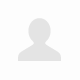
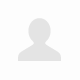

In [31]:
html = driver.page_source # 크롬 드라이버가 띄어 놓은 html 문서를 가지고 와서 변수 html에 저장
html

<html data-platform="win32" data-useragent="mozilla/5.0 (windows nt 10.0; win64; x64) applewebkit/537.36 (khtml, like gecko) chrome/133.0.0.0 safari/537.36" lang="ko"><head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="코로나 : 네이버 검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'코로나'의 네이버 검색 결과입니다." property="og:description"/> <meta content="'코로나'의 네이버 검색 결과입니다." lang="ko" name="description"/> <title>코로나 : 네이버 검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_32x32_240820.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_250109.css" rel="stylesheet" type="text/css"/> <l
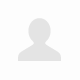
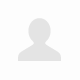

In [32]:
from bs4 import BeautifulSoup
# html = requests.get()일 경우 html.content를 사용가능
# html = driver.get()일 경우 html만 사용

soup = BeautifulSoup(html,'html.parser')
soup

In [33]:
#뉴스 타이틀 추출
tit_lst = soup.select('a.news_tit')

In [34]:
for title in tit_lst:
    print(title.text)

# 크롬 브라우저 닫기 가능함
# driver.quit()

지난해 '나홀로 사장님' 6년 만에 감소…코로나19 때보다 악화
디엑스앤브이엑스, 범용 코로나 바이러스 예방 백신 임상 2상 준비
아르헨티나, 코로나 격리로 경제 타격... WHO 탈퇴 결정
코로나 당시 비좁은 방 수용 재소자, 손배 2심선 패소


In [35]:
driver.quit()